In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from pathlib import Path
from os.path import join
from glob import glob

sns.set()
sns.set_palette('colorblind');

/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv/run_1/rep00/fitnesslog.txt


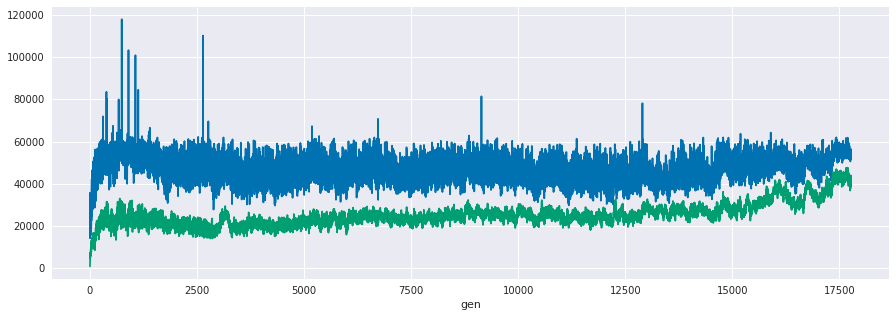

no data, continue
/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv/run_2/rep00/fitnesslog.txt


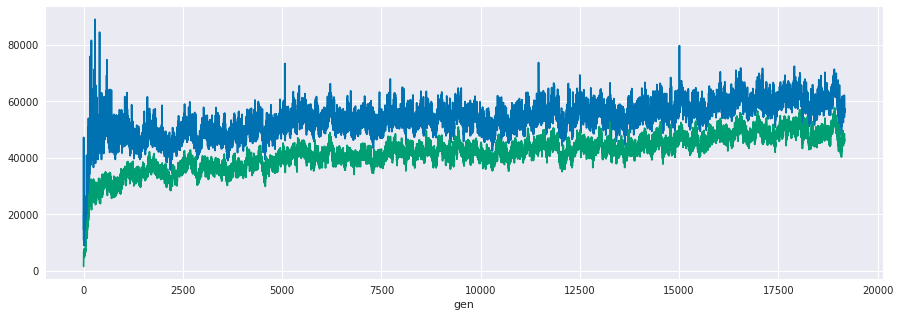

gen: 17999


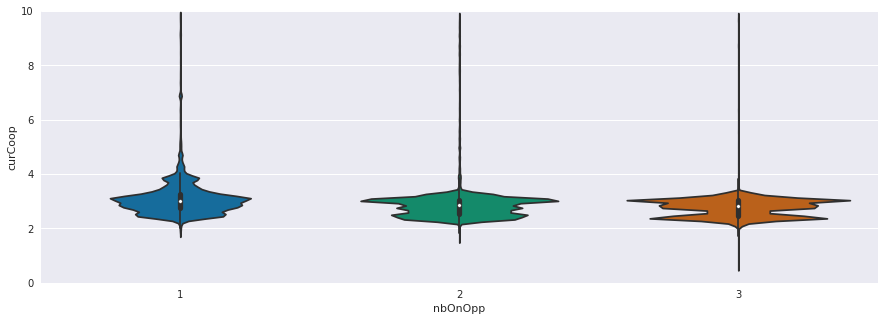

/home/pecoffet/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


3.1137841536964985


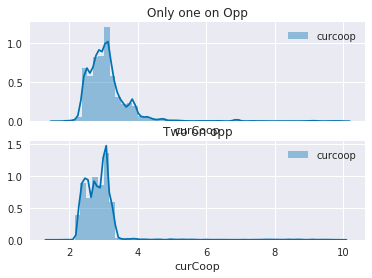

2.873885711063704
its other


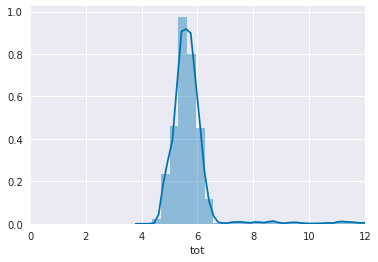

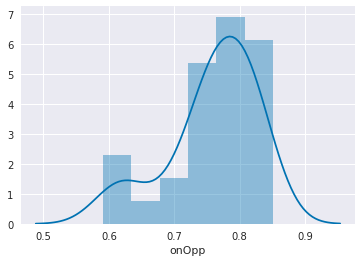

/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv/run_3/rep00/fitnesslog.txt


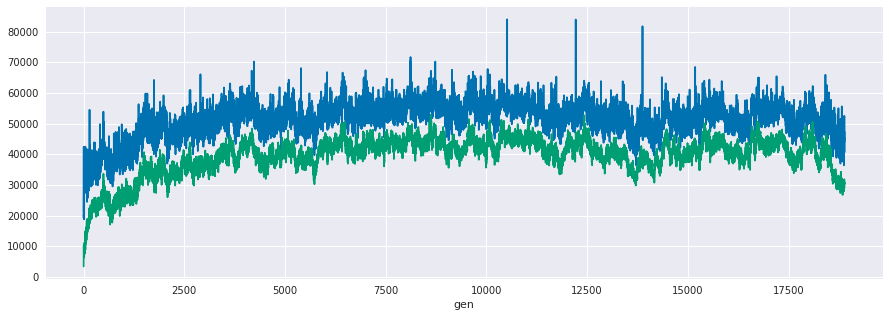

gen: 17999


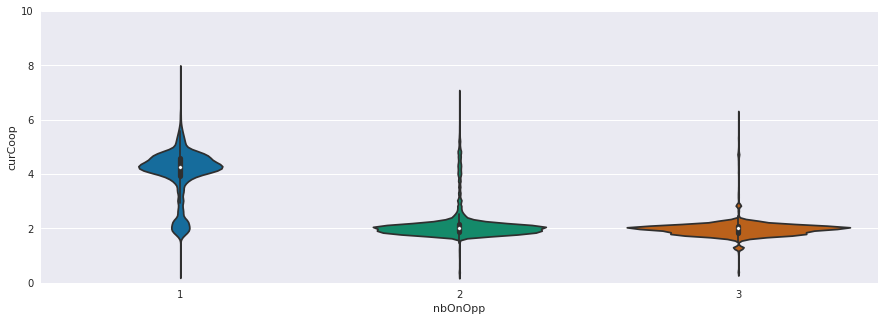

4.046189574010828


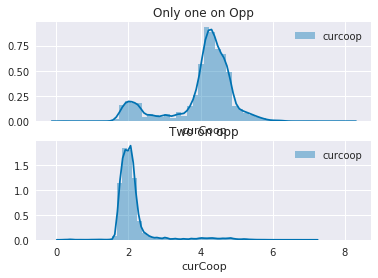

2.13165184404788
its other


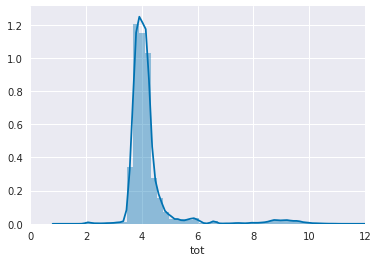

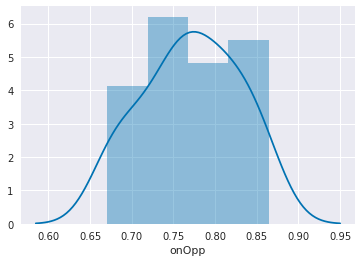

/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv_fake/run_1/rep00/fitnesslog.txt


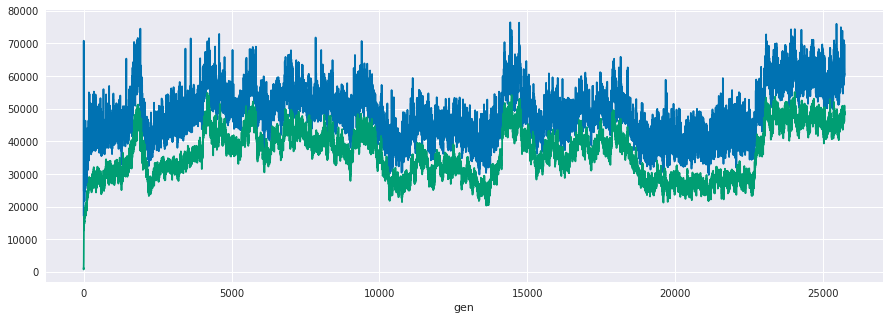

gen: 17999


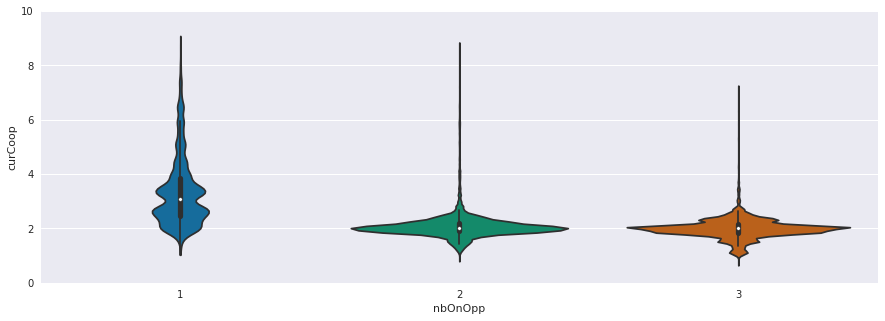

3.3309608252259264


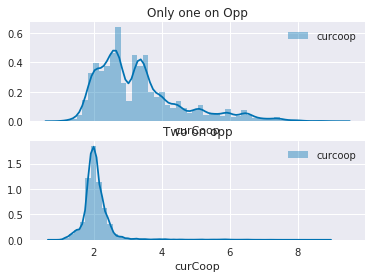

2.087082798254276
its other


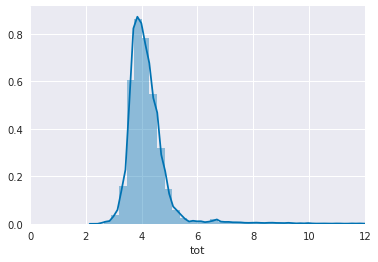

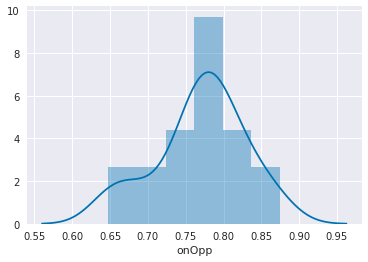

/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv_fake/run_2/rep00/fitnesslog.txt


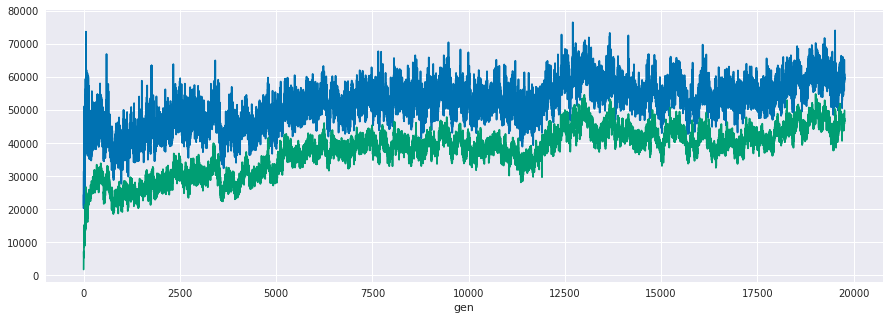

gen: 17999


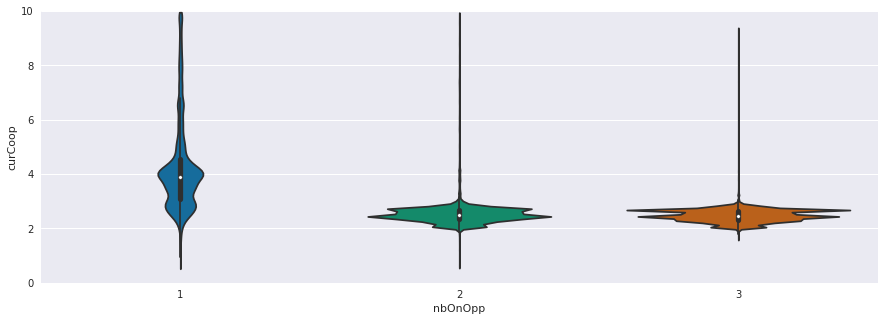

4.254071284017765


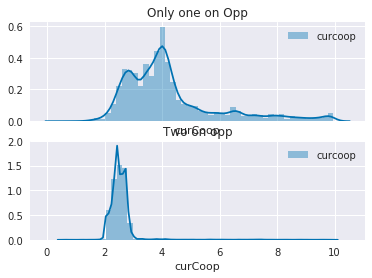

2.5723038187580447
its other


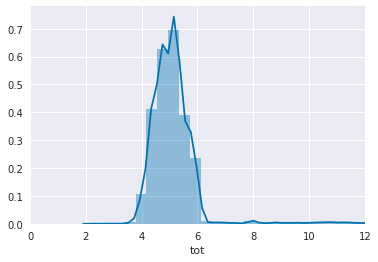

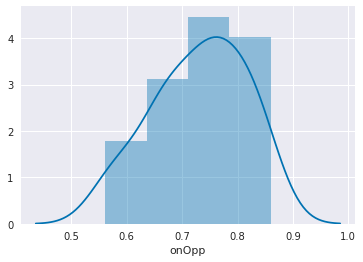

/data/logs/2018-05-15-1737-bm-grid-fake-mulambda/other_noinv_fake/run_3/rep00/fitnesslog.txt


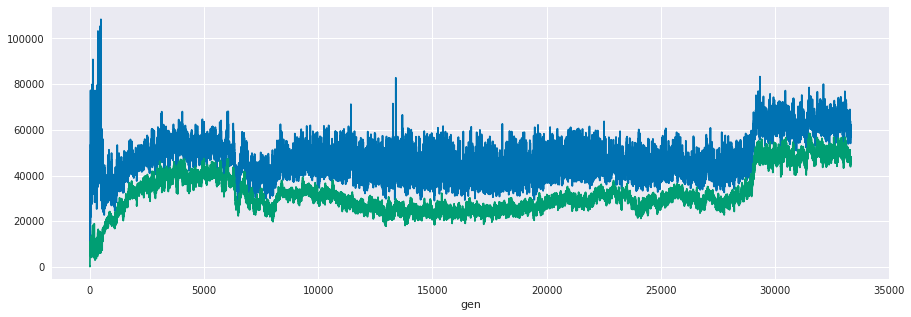

gen: 17999


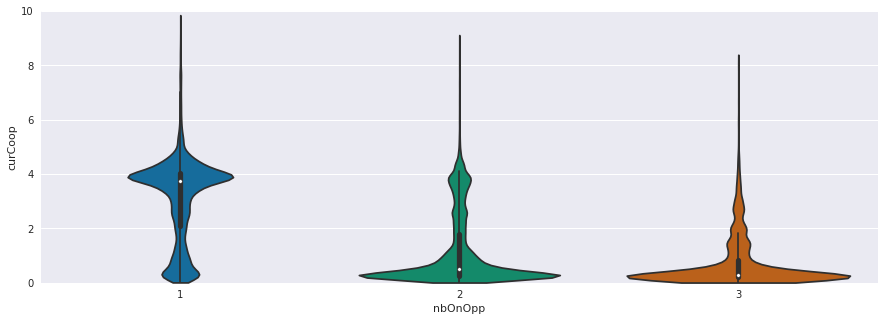

3.1098287325303366


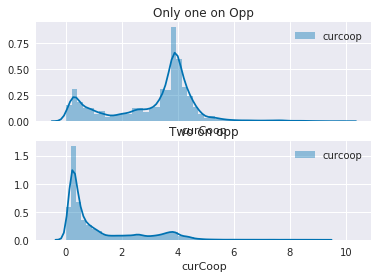

1.1941641616366554
its other


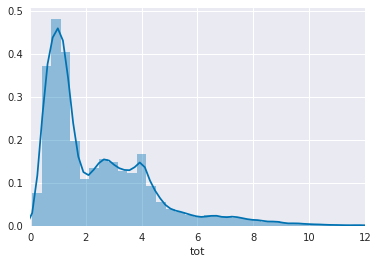

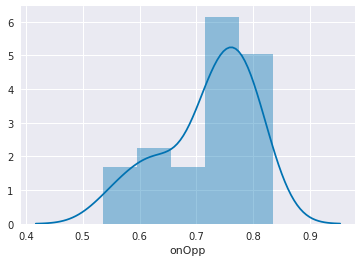

In [4]:

run_folder = '2018-05-15-1737-bm-grid-fake-mulambda'

#run_folder = '2018-05-15-1738-bm-grid-fake-cmaes'


conds = sorted(glob(f'/data/logs/{run_folder}/**/*other*/**/rep00', recursive=True))

for cond in conds:
    try:
        fitpath = Path(cond) / "fitnesslog.txt"
        fit = pd.read_csv(fitpath, delimiter="\t").query('fitness > 0')
    except Exception:
        continue
    else:
        print(fitpath)

    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
    fit.groupby('gen')['fitness'].max().plot(ax=ax1)
    fit.groupby('gen')['fitness'].median().plot(ax=ax1)

    plt.show(fig)

    for gen in [17999]:
        logfile = join(cond, f'logall_{gen}.txt')
        i = 0
        ok = True
        to_format = '{' in logfile
        logs = []
        while ok:
            try:
                dat = pd.read_csv(logfile.format(i), delimiter="\t")
                dat["eval"] = i
                logs.append(dat)
            except:
                ok = False
            else:
                i += 1
                ok = to_format
        try:
            log = pd.concat(logs).query('fake==0')
        except Exception:
            plt.show(fig)
            print("no data, continue")
            continue
        print("gen:", gen)
        fig, ax2 = plt.subplots(1, 1, figsize=(15, 5))
        sns.violinplot(data=log.query('1 <= nbOnOpp <= 3 and onOpp == 1 and fake == 0'), x='nbOnOpp', y='curCoop', cut=0, ax=ax2)
        ax2.set_ylim(0, 10)
        plt.show(fig)

        on_opp = log.query('onOpp == 1 and nbOnOpp == 1')
        fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        ax = ax1
        sns.distplot(on_opp['curCoop'], label="curcoop", ax=ax)
        #sns.distplot(on_opp['a']/on_opp['nbOnOpp'], label="ess")
        print(on_opp['curCoop'].mean())
        ax.set_title('Only one on Opp')
        ax.legend()

        ax = ax2
        on_opp = log.query('onOpp == 1 and nbOnOpp == 2').copy()
        sns.distplot(on_opp['curCoop'], label="curcoop", ax=ax)
        #sns.distplot(on_opp['a'], label="ess")
        ax.legend()
        ax.set_title('Two on opp')
        plt.show(fig)
        print(on_opp['curCoop'].mean())
        
        fig, ax = plt.subplots()
        if 'other' in cond:
            print('its other')
            on_opp['tot'] = on_opp['meanTotal'] + on_opp['curCoop']
        else:
            on_opp['tot'] = on_opp['meanTotal']
        sns.distplot(on_opp['tot'], ax=ax)
        ax.set_xlim(0, 12)
        plt.show(fig)
        
        fig, ax = plt.subplots()
        sns.distplot(log.groupby('id')['onOpp'].mean())
        plt.show()


In [3]:
print(scipy.stats.normaltest(on_opp['curCoop']))
print(scipy.stats.normaltest(on_opp['a']))

NormaltestResult(statistic=89649.11920243535, pvalue=0.0)
NormaltestResult(statistic=1.0000389807568009, pvalue=0.6065188383157663)


Not normal, so wilcoxon

In [4]:
scipy.stats.wilcoxon(on_opp['curCoop'], on_opp['a']/on_opp['nbOnOpp'])

WilcoxonResult(statistic=5263517021.0, pvalue=0.0)

In [5]:
on_opp['curCoop'].median(), (on_opp['a']/on_opp['nbOnOpp']).median()

(2.52494, 2.5)

a ne varie pas


/home/pecoffet/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


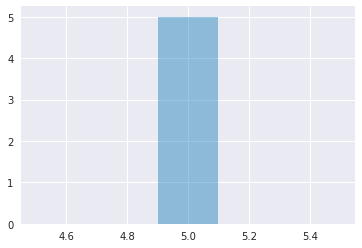

In [6]:
try: 
    sns.distplot(log.groupby('id').mean()['a'])
except:
    print("a ne varie pas")

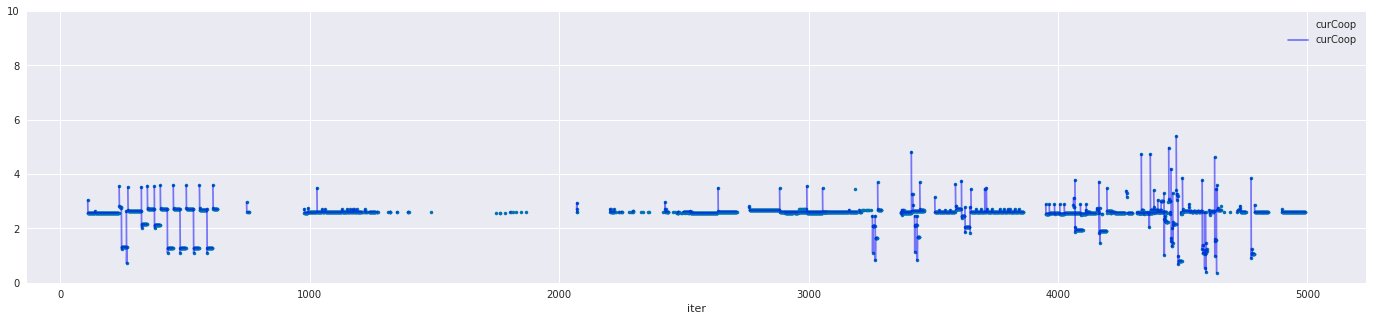

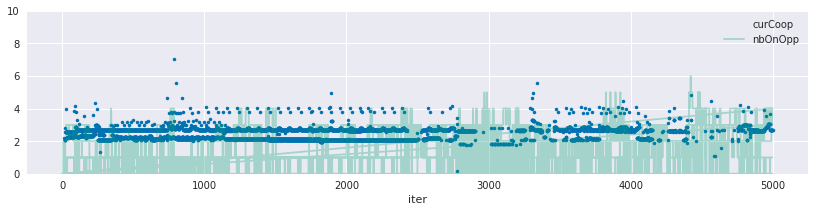

In [26]:
beg = 0
end = 5000
ind = 0
fig = plt.figure(figsize=(24,5))
ax = fig.gca()
nlog = log.query('fake == 0').copy()
nlog['curCoop'] = np.where(nlog['nbOnOpp'] == 2, nlog['curCoop'], np.nan)
nlog.query('id == {}'.format(ind)).plot(x='iter', y='curCoop', ax=ax, style='.')
nlog.query('id == {}'.format(ind)).plot(x='iter', y='curCoop', ax=ax, style='-', c='b', alpha=0.5)
#nlog.query('id == {}'.format(ind)).plot(alpha=0.3, x='iter', y='nbOnOpp', ax=ax)
ax.set_ylim(0, 10)

fig = plt.figure(figsize=(14,3))
ax = fig.gca()
nlog = log.copy()
nlog['curCoop'] = np.where(nlog['nbOnOpp'] == 1, nlog['curCoop'], np.nan)
nlog.query('id == {}'.format(ind)).plot(x='iter', y='curCoop', ax=ax, style='.')
nlog.query('id == {}'.format(ind)).plot(alpha=0.3, x='iter', y='nbOnOpp', ax=ax)
ax.set_ylim(0, 10);

In [167]:
%%script false 
c = 1
defforgive = 0
forgive = defforgive
log['step'] = np.nan
for e in log['eval'].unique():
    for j in log['id'].unique():
        for i, elem in log.query(f'id == {j} and eval == {e}').iterrows():
            if elem['onOpp'] == 1:
                if elem['nbOnOpp'] >= 2:
                    log.at[i, 'step'] = c
                    c += 1
                    forgive = defforgive
                else:
                    forgive -= 1
                    if forgive > 0 and c > 1:
                        log.at[i, 'step'] = c
                        c += 1
                        print("forgiven")
                    else:
                        c = 1
                        forgive = defforgive
            else:
                c = 1
                forgive = defforgive
        c=1
        forgive = defforgive

In [168]:
log.query('id == 2 and step >= 1')

UndefinedVariableError: name 'step' is not defined

UndefinedVariableError: name 'step' is not defined

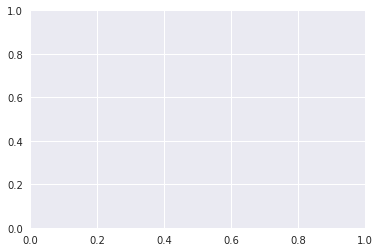

In [122]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(log.query('step > 40 and nbOnOpp == 2')['curCoop'], ax=ax)
ax.set_xlim(0, 10)

fig = plt.figure()
ax = fig.gca()
sns.distplot(log.query('step >= 0 and nbOnOpp == 2')['curCoop'], ax=ax)
ax.set_xlim(0, 10)


In [123]:
log.groupby('step').mean().plot(y='curCoop')

KeyError: 'step'

In [140]:
log.query('curCoop > 3 and nbOnOpp == 2')

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
283,0,9,13,5,1,2,4.01307,4.01307,5.03242
332,0,11,2,5,1,2,3.76133,2.39883,2.88289
362,0,12,2,5,1,2,3.19235,2.66334,3.04648
392,0,13,2,5,1,2,3.44265,2.85817,3.18960
414,0,13,24,5,1,2,4.49956,4.54894,4.58513
422,0,14,2,5,1,2,3.59677,3.00589,3.29687
452,0,15,2,5,1,2,3.71399,3.12390,3.41688
482,0,16,2,5,1,2,3.75964,3.21472,3.50742
502,0,16,22,5,1,2,3.85873,3.85873,8.28744
503,0,16,23,5,1,2,4.42872,4.44664,5.73288


/home/pecoffet/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


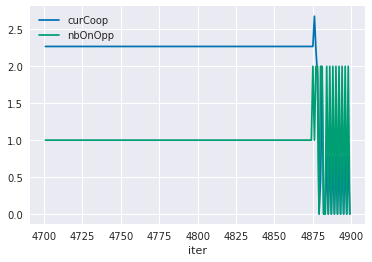

In [141]:
log.query(f'eval == 0 and 4700 < iter < 4900 and id == 3').plot(x='iter', y=['curCoop', 'nbOnOpp'])


In [142]:
def p(invest, totalInvest, a, n):
    b = 1
    return (a * totalInvest + b * (totalInvest - invest)) / n - 0.5 * invest * invest

1.3332743691034283

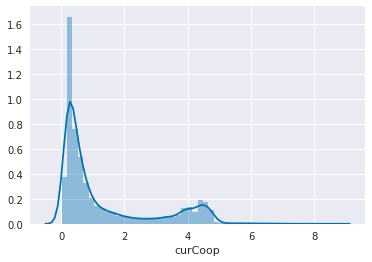

In [143]:
curcoop = log.query('nbOnOpp == 2')['curCoop']
meantot = log.query('nbOnOpp == 2')['meanTotal']
a = log.query('nbOnOpp == 2')['a']
n = log.query('nbOnOpp == 2')['nbOnOpp']
sns.distplot(curcoop)
curcoop.mean()

In [144]:
cur = p(curcoop, meantot, a, n).sum()
cur

333052.50806842686

In [145]:
opti = p(a/n, meantot - curcoop + a/n, a, n).sum()
opti

443171.05738315

In [146]:
(cur - opti) / opti

-0.24847865734949953